##                                                  Day 1 - Part_1 LAB

###  REGRESSION MACHINE LEARNING - Baseline Model Implementation

In [10]:
#importing required libraries for data analysis
import pandas as pd
import numpy as np
import time

# Import models from sklearn
from sklearn.linear_model import LinearRegression,ElasticNet,Ridge,Lasso,LassoCV,RidgeCV
from sklearn.tree import DecisionTreeRegressor

#Import Ensemble models
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from xgboost import XGBRegressor

# Import evaluation metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

#Visuals
import matplotlib.pyplot as plt

In [11]:
# Read the training & test datasets from Part1-Preprocessing part

X_train=pd.read_csv("./regression_dataset/X_train.csv", index_col=0)
y_train=pd.read_csv("./regression_dataset/y_train.csv", index_col=0)
                    
X_test=pd.read_csv("./regression_dataset/X_test.csv", index_col=0)
y_test=pd.read_csv("./regression_dataset/y_test.csv", index_col=0)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(909, 31) (427, 31) (909, 1) (427, 1)


## 1. Linear Regression Model

In [12]:
# Importing the Linear Regression Model
lrmodel = LinearRegression()
start = time.time()
#Train the model
lrmodel.fit(X_train, y_train)
stop = time.time()

# predicting the y test observations
y_pred = lrmodel.predict(X_test)
y_train_pred = lrmodel.predict(X_train)

In [13]:
# y = beta0 + beta1 * X1 + beta2 * X3 +...+ E
intercept= lrmodel.intercept_[0]
coefficients=lrmodel.coef_[0]
print("y =",intercept," + ")
for i in range(len(coefficients)):
    print(coefficients[i],"*",X_train.columns[i]," + ", end="")
print(" E")

y = 10.723706484134702  + 
0.00030504812279513765 * OpenPorchSF  + 0.142854320808746 * x0_Y  + -0.026690167805138335 * x3_No  + 0.0001496363744616284 * GarageArea  + -0.0026620642735121856 * YearRemodAdd  + 0.008921651816753074 * TotRmsAbvGrd  + 0.006457181245353147 * x4_SBrkr  + -0.022999915293182942 * x1_2fmCon  + 0.01026163915615694 * x9_BrkTil  + 0.13381684957033552 * x2_2Story  + 0.05408181352373154 * x3_Gd  + 0.07746574396554341 * x9_PConc  + 0.06511803457904271 * x6_CulDSac  + 0.07426876151284302 * x2_1.5Fin  + 0.0020025795716005703 * LotFrontage_median  + 0.00013125951001046824 * WoodDeckSF  + 0.007769279779374693 * x6_Inside  + 0.06368546676771786 * isNew  + -0.027088500067798903 * x1_Twnhs  + 0.08494620058483258 * FullBath  + -0.1762889724556731 * x5_Grav  + 8.233603188442678e-06 * LotArea  + -0.01371658882679391 * x12_MnPrv  + 0.07741354110281186 * HalfBath  + -0.07330556373042178 * x12_GdWo  + 0.00036442898836611055 * firstFlrSF  + -0.004698638665784773 * x3_Av  + 0.1258508

Text(0, 0.5, 'y_pred_manual')

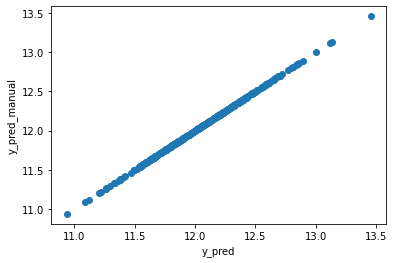

In [14]:
# predicting the y test observations manually
y_pred_mn=intercept + np.sum(coefficients * X_test, axis=1)
plt.scatter(y_pred_mn,y_pred)
plt.xlabel("y_pred")
plt.ylabel("y_pred_manual")

### Feature Importance 

In regression analysis, the magnitude of your coefficients is not necessarily related to their importance.

In [15]:
stdevs= []
for i in X_train.columns:
    stdev=X_train[i].std()
    stdevs.append(stdev)

In [16]:
features=pd.DataFrame(coefficients, X_train.columns, columns=['coef'])

#normalized feature importance 
features['importance']=np.array(stdevs)*features["coef"].abs()/max(np.array(stdevs)*features["coef"].abs()) 
features = features.sort_values(by = "importance")
features.reset_index(inplace=True)
features = features.rename(columns = {'index':'features'})

Text(0.5, 0, 'Feature Importance')

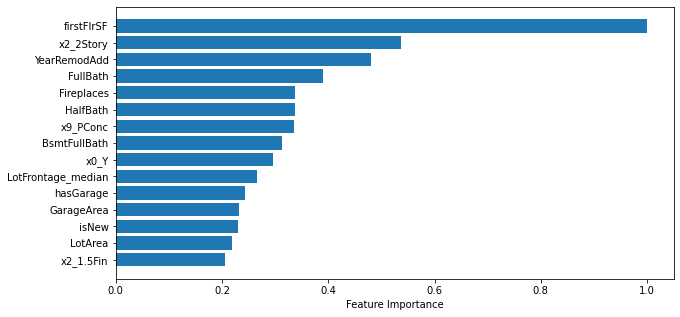

In [17]:
#Feature Importance
plt.figure(figsize=(10,5))
plt.barh(features['features'][-15:], features['importance'][-15:])
plt.xlabel("Feature Importance")

### Model Evaluation

In [18]:
#Model Evaluation
lrm_trscore = round(lrmodel.score(X_train, y_train),3)
lrm_tescore = round(lrmodel.score(X_test, y_test),3)
lrm_r2= round(r2_score(y_test,y_pred),3) #coefficient of determination
lrm_adj= round(1 - (1-lrm_r2)*(len(y_test)-1)/(len(y_test)-len(X_test.columns)-1),3)
lrm_mae= round(mean_absolute_error(y_test,y_pred),3)                      
lrm_mse= round(mean_squared_error(y_test,y_pred),3)
lrm_rmse= round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
lrm_feat=np.array(features['features'][::-1][:3])
#Training time of the model
lrm_time=stop-start

results = pd.DataFrame([['Linear Regression', lrm_trscore, lrm_tescore, lrm_adj, lrm_mae, lrm_mse, lrm_rmse, lrm_time, lrm_feat]],
               columns = ['Model', 'Train Score', 'Test Score/R-Square','Adjusted R^2', 'MAE', 'MSE', 'RMSE', "Training Time(s)","Important Features"])
pd.set_option('display.max_colwidth', 100)
results

,Model,Train Score,Test Score/R-Square,Adjusted R^2,MAE,MSE,RMSE,Training Time(s),Important Features
0,Linear Regression,0.811,0.786,0.769,0.128,0.032,0.178,0.006192,"[firstFlrSF, x2_2Story, YearRemodAdd]"


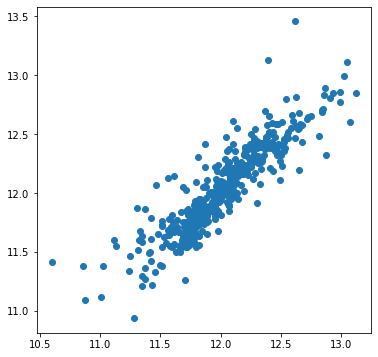

In [19]:
# Test vs Prediction
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)

### Task 1 - **Build a different model, Evaluate the predictions & Compare the results**

In [20]:
# Import the Model from sklearn



In [21]:
# Fit the Model & Predict  - X_train, y_train, X_test, y_test





In [22]:
# Visualize Important Features





In [23]:
# Evaluation the model predictions

###  **Build a different model, Evaluate the predictions & Compare the results**




##                                                  Day 2 -Part_1 LAB

###  REGRESSION MACHINE LEARNING - Ensemble Model Implementation

### **Random Forest Regression Model**

In [24]:
# Importing the Random Forest Regressor
rfr= RandomForestRegressor()
start = time.time()
print(start)
#Fitting data into Random Forest Regressor
rfr.fit(X_train, y_train)
stop = time.time()
print(stop)
#print("dif",stop-start)
# predicting the y test observations
y_pred = rfr.predict(X_test)
y_train_pred = rfr.predict(X_train)

1659512834.6557698


/tmp/ipykernel_150/103226387.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


1659512834.9488018


#### **Feature Importance**

Text(0.5, 1.0, 'Feature Importance')

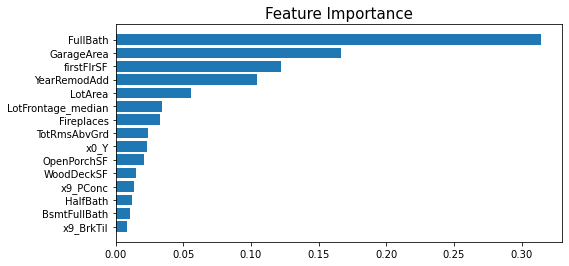

In [26]:
#Feature Importance
sort = rfr.feature_importances_.argsort()
plt.figure(figsize=(8,4))
plt.barh(X_train.columns[sort[-15:]], rfr.feature_importances_[sort[-15:]])
plt.title('Feature Importance', size=15)

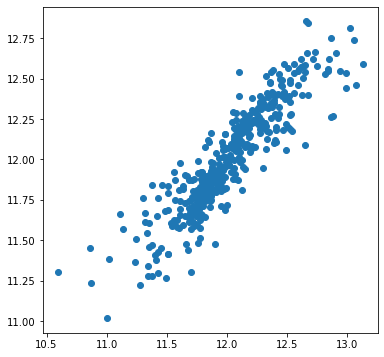

In [27]:
# Test vs Prediction
plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)

#### **Model Evaluation**

In [28]:
#Model Evaluation
rfr_trscore = round(rfr.score(X_train, y_train),3)
rfr_tescore = round(rfr.score(X_test, y_test),3)
rfr_r2= round(r2_score(y_test,y_pred),3)
rfr_adj= round(1 - (1-rfr_r2)*(len(y_test)-1)/(len(y_test)-len(X_test.columns)-1),3)
rfr_mae= round(mean_absolute_error(y_test,y_pred),3)                      
rfr_mse= round(mean_squared_error(y_test,y_pred),3)
rfr_rmse= round(np.sqrt(mean_squared_error(y_test,y_pred)),3)
rfr_feat = dict(zip(X_train.columns[sort[::-1][:3]], np.round(rfr.feature_importances_[sort[::-1][:3]],3)))
#Training time of the model
rfr_time=stop-start

results = pd.DataFrame([['Random Forest', rfr_trscore, rfr_tescore, rfr_adj, rfr_mae, rfr_mse, rfr_rmse, rfr_time, rfr_feat]],
               columns = ['Model', 'Train Score', 'Test Score/R-Square','Adjusted R^2', 'MAE', 'MSE', 'RMSE', "Training Time(s)","Important Features"])
results

,Model,Train Score,Test Score/R-Square,Adjusted R^2,MAE,MSE,RMSE,Training Time(s),Important Features
0,Random Forest,0.97,0.808,0.793,0.117,0.029,0.169,0.293032,"{'FullBath': 0.314, 'GarageArea': 0.167, 'firstFlrSF': 0.122}"


### Task 1 -  **Build a Boosting model, Evaluate the predictions & Compare the results**

In [ ]:
# Import the Model from sklearn



In [ ]:
# Fit the Model & Predict  - X_train, y_train, X_test, y_test



In [ ]:
# Visualize Important Features





In [ ]:
# Evaluation the model predictions





### Task 2 -  **Build a Bagging model, Evaluate the predictions & Compare the results**

In [ ]:
# Import the Model from sklearn



In [ ]:
# Fit the Model & Predict  - X_train, y_train, X_test, y_test



In [ ]:
# Visualize Important Features





In [ ]:
# Evaluation the model predictions



